In [1]:
import torch
import numpy as np
from main import *
from torch.utils.data import DataLoader
from models.transformers import TransformerRegressor
from models.deepsets import DeepSetRegression

In [2]:
# np.random.seed(100)
# torch.manual_seed(100)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader = DataLoader(AntDataset2D('data/large/YZ_Large_testing.npz'), batch_size= 64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/YZ_Large_training.npz'), batch_size= 64, shuffle=True)
model = DeepSetRegression(2, 1, 1, pooling='robust_mean', dim_hidden= 32).to(device)

learning_rate = 1e-3
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Epoch 1 - Train Loss: 0.2101, Test Loss: 0.0716
Epoch 2 - Train Loss: 0.0743, Test Loss: 0.0680
Epoch 3 - Train Loss: 0.0708, Test Loss: 0.0635
Epoch 4 - Train Loss: 0.0671, Test Loss: 0.0605
Epoch 5 - Train Loss: 0.0627, Test Loss: 0.0569
Epoch 6 - Train Loss: 0.0596, Test Loss: 0.0524
Epoch 7 - Train Loss: 0.0563, Test Loss: 0.0666
Epoch 8 - Train Loss: 0.0537, Test Loss: 0.0476
Epoch 9 - Train Loss: 0.0497, Test Loss: 0.0458
Epoch 10 - Train Loss: 0.0473, Test Loss: 0.0397
Epoch 11 - Train Loss: 0.0429, Test Loss: 0.0442
Epoch 12 - Train Loss: 0.0400, Test Loss: 0.0377
Epoch 13 - Train Loss: 0.0375, Test Loss: 0.0381
Epoch 14 - Train Loss: 0.0364, Test Loss: 0.0330
Epoch 15 - Train Loss: 0.0344, Test Loss: 0.0349
Epoch 16 - Train Loss: 0.0346, Test Loss: 0.0307
Epoch 17 - Train Loss: 0.0337, Test Loss: 0.0342
Epoch 18 - Train Loss: 0.0321, Test Loss: 0.0333
Epoch 19 - Train Loss: 0.0320, Test Loss: 0.0282
Epoch 20 - Train Loss: 0.0305, Test Loss: 0.0268
Epoch 21 - Train Loss: 0.0303

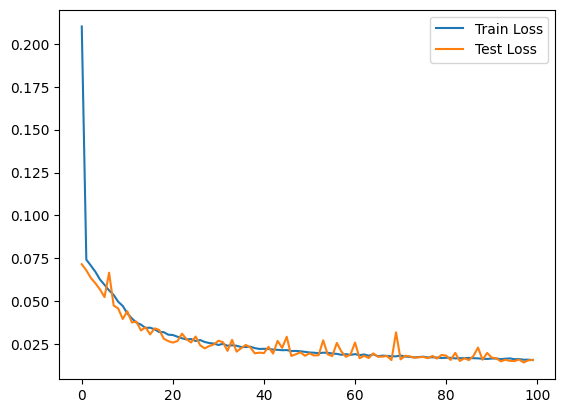

In [3]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [4]:
# np.random.seed(100)
# torch.manual_seed(100)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader = DataLoader(AntDataset2D('data/large/YZ_Large_testing.npz'), batch_size= 64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/YZ_Large_training.npz'), batch_size= 64, shuffle=True)
model = DeepSetRegression(2, 1, 1, pooling='robust_mean', dim_hidden= 64).to(device)

learning_rate = 1e-3
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Epoch 1 - Train Loss: 0.1562, Test Loss: 0.0672
Epoch 2 - Train Loss: 0.0740, Test Loss: 0.0649
Epoch 3 - Train Loss: 0.0673, Test Loss: 0.0620
Epoch 4 - Train Loss: 0.0614, Test Loss: 0.0542
Epoch 5 - Train Loss: 0.0585, Test Loss: 0.0593
Epoch 6 - Train Loss: 0.0545, Test Loss: 0.0484
Epoch 7 - Train Loss: 0.0498, Test Loss: 0.0599
Epoch 8 - Train Loss: 0.0447, Test Loss: 0.0398
Epoch 9 - Train Loss: 0.0387, Test Loss: 0.0314
Epoch 10 - Train Loss: 0.0367, Test Loss: 0.0287
Epoch 11 - Train Loss: 0.0338, Test Loss: 0.0342
Epoch 12 - Train Loss: 0.0301, Test Loss: 0.0345
Epoch 13 - Train Loss: 0.0297, Test Loss: 0.0244
Epoch 14 - Train Loss: 0.0267, Test Loss: 0.0291
Epoch 15 - Train Loss: 0.0269, Test Loss: 0.0295
Epoch 16 - Train Loss: 0.0254, Test Loss: 0.0234
Epoch 17 - Train Loss: 0.0247, Test Loss: 0.0209
Epoch 18 - Train Loss: 0.0241, Test Loss: 0.0237
Epoch 19 - Train Loss: 0.0236, Test Loss: 0.0216
Epoch 20 - Train Loss: 0.0227, Test Loss: 0.0215
Epoch 21 - Train Loss: 0.0221

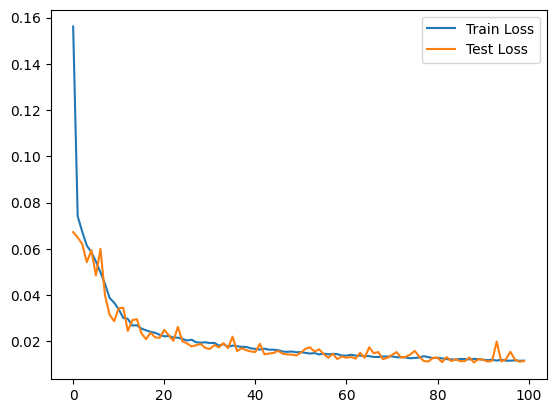

In [5]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [6]:
# np.random.seed(100)
# torch.manual_seed(100)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader = DataLoader(AntDataset2D('data/large/YZ_Large_testing.npz'), batch_size= 64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/YZ_Large_training.npz'), batch_size= 64, shuffle=True)
model = DeepSetRegression(2, 1, 1, pooling='l1', dim_hidden= 64).to(device)

learning_rate = 1e-4
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Epoch 1 - Train Loss: 0.1914, Test Loss: 0.0761
Epoch 2 - Train Loss: 0.0766, Test Loss: 0.0855
Epoch 3 - Train Loss: 0.0692, Test Loss: 0.0796
Epoch 4 - Train Loss: 0.0657, Test Loss: 0.0583
Epoch 5 - Train Loss: 0.0607, Test Loss: 0.0549
Epoch 6 - Train Loss: 0.0583, Test Loss: 0.0513
Epoch 7 - Train Loss: 0.0554, Test Loss: 0.0473
Epoch 8 - Train Loss: 0.0518, Test Loss: 0.0518
Epoch 9 - Train Loss: 0.0492, Test Loss: 0.0458
Epoch 10 - Train Loss: 0.0477, Test Loss: 0.0440
Epoch 11 - Train Loss: 0.0457, Test Loss: 0.0392
Epoch 12 - Train Loss: 0.0446, Test Loss: 0.0376
Epoch 13 - Train Loss: 0.0427, Test Loss: 0.0431
Epoch 14 - Train Loss: 0.0412, Test Loss: 0.0362
Epoch 15 - Train Loss: 0.0398, Test Loss: 0.0411
Epoch 16 - Train Loss: 0.0384, Test Loss: 0.0336
Epoch 17 - Train Loss: 0.0376, Test Loss: 0.0320
Epoch 18 - Train Loss: 0.0353, Test Loss: 0.0332
Epoch 19 - Train Loss: 0.0350, Test Loss: 0.0366
Epoch 20 - Train Loss: 0.0343, Test Loss: 0.0407
Epoch 21 - Train Loss: 0.0332

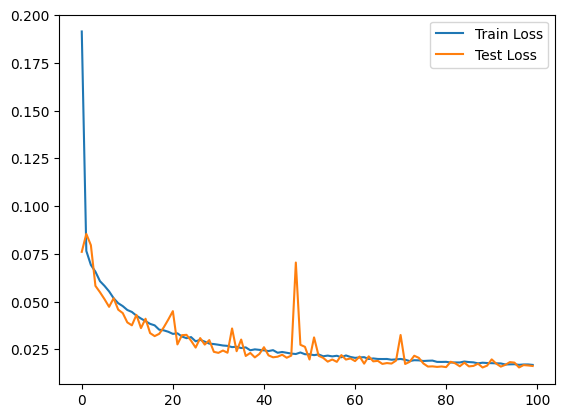

In [7]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [ ]:

np.random.seed(100)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = np.load('data/large/YZ_Cost_Scaled.npz')['data']
data = data[np.random.permutation(data.shape[0]), :]
model = NN2(2048, 1, 8, 8, nn.ReLU)
print('Loaded Model and Data')
learning_rate = 1e-4
num_epochs = 50
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
size = 64
seed = True

training_loss, testing_loss = cross_validate(5, model, optimizer, criterion, num_epochs, data, size, seed, device)

In [ ]:
ff1 = SimpleNN(2048, 1, 8, nn.ReLU)
learning_rate = 1e-4
num_epochs = 50
criterion = nn.MSELoss()
optimizer = optim.Adam(ff1.parameters(), lr = learning_rate)
size = 64

train_loss1, test_loss1 = cross_validate(5, ff1, optimizer, criterion, num_epochs, data, size,True, device)

In [ ]:
for i in range(5):
    plt.plot(training_loss[i], label = 'Train Loss')
    plt.plot(testing_loss[i], label = 'Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('Two-Layers Feedforward')
    plt.legend()
    plt.show()

In [ ]:
for i in range(5):
    plt.plot(train_loss1[i], label = 'Train Loss')
    plt.plot(test_loss1[i], label = 'Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('One-Layer Feedforward')
    plt.legend()
    plt.show()


In [3]:
net = SimpleNN(2048, 1, 8, nn.ReLU)
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()
net.apply(weight_reset)

SimpleNN(
  (regressor): Sequential(
    (0): Linear(in_features=2048, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=8, out_features=1, bias=True)
  )
)

## Transformer Base Test

In [3]:
train_data_path = 'data/large/YZ_Large_testing.npz'
test_data_path = 'data/large/YZ_Large_training.npz'

torch.manual_seed(0)
train_loader = DataLoader(AntDataset2D(train_data_path), batch_size = 64, shuffle= True)
test_loader = DataLoader(AntDataset2D(test_data_path), batch_size = 64, shuffle = True)

print('Finish DataLoaders')

# Hyperparameters
d_model = 1024
nhead = 2
num_encoder_layers = 6
num_decoder_layers = 6
dim_feedforward = 1024
dropout = 0.1
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TransformerRegressor(d_model, nhead,
                             num_encoder_layers,
                             num_decoder_layers,
                             dim_feedforward,
                             dropout).to(device)
print('Loaded Model')
learning_rate = 1e-3
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epochs, device)

Finish DataLoaders
Loaded Model


/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/nn/modules/transformer.py:287: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Epoch 1 - Train Loss: 1.0906, Test Loss: 0.8875
Epoch 2 - Train Loss: 0.8954, Test Loss: 0.8836
Epoch 3 - Train Loss: 0.8903, Test Loss: 0.8839
Epoch 4 - Train Loss: 0.8881, Test Loss: 0.8795
Epoch 5 - Train Loss: 0.8862, Test Loss: 0.8795
Epoch 6 - Train Loss: 0.8858, Test Loss: 0.8795
Epoch 7 - Train Loss: 0.8856, Test Loss: 0.8795
Epoch 8 - Train Loss: 0.8860, Test Loss: 0.8802
Epoch 9 - Train Loss: 0.8855, Test Loss: 0.8794
Epoch 10 - Train Loss: 0.8861, Test Loss: 0.8799


KeyboardInterrupt: 

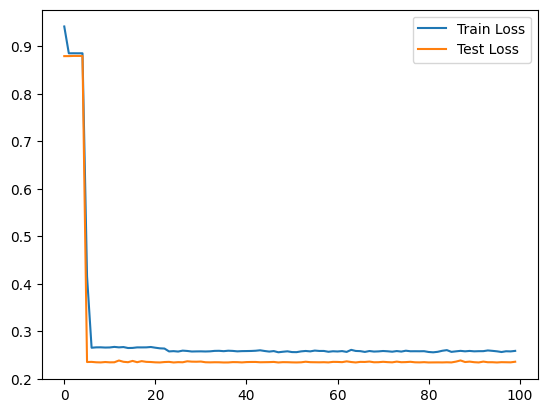

In [4]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

## 1-layer NN

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_data_path = 'YZ_Large_training.npz'
test_data_path = 'YZ_Large_testing.npz'
train_loader = DataLoader(AntDataset(train_data_path), batch_size=32, shuffle=True)
test_loader = DataLoader(AntDataset(test_data_path), batch_size=32, shuffle=True)

print('Loaded Data')

# Hyperparameters
model = SimpleNN(2048, 1, 8, nn.ReLU)
model.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Loaded Data
Average Cost: 0.029260745272040367
Random Guess: 0.0003676150380014723
Epoch 1 - Train Loss: 0.0381, Test Loss: 0.0189
Average Cost: 0.02934732846915722
Random Guess: 0.0004268583046222516
Epoch 2 - Train Loss: 0.0145, Test Loss: 0.0138
Average Cost: 0.029246384277939796
Random Guess: 0.00044581261207937456
Epoch 3 - Train Loss: 0.0126, Test Loss: 0.0130
Average Cost: 0.029361430555582047
Random Guess: 0.0004775790203424595
Epoch 4 - Train Loss: 0.0114, Test Loss: 0.0119
Average Cost: 0.029377372935414314
Random Guess: 0.0004186142739180296
Epoch 5 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029280079528689384
Random Guess: 0.0004268459763682636
Epoch 6 - Train Loss: 0.0103, Test Loss: 0.0111
Average Cost: 0.029285846278071404
Random Guess: 0.0004787548158552593
Epoch 7 - Train Loss: 0.0098, Test Loss: 0.0104
Average Cost: 0.02927250601351261
Random Guess: 0.00041671495926212513
Epoch 8 - Train Loss: 0.0095, Test Loss: 0.0110
Average Cost: 0.02937469631433487
Ra

In [3]:
two_layer = NN2(2048, 1, 8, 8, nn.ReLU)
two_layer.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(two_layer.parameters(), lr = learning_rate)

train_loss2, test_loss2 = train_and_evaluate(two_layer, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Average Cost: 0.029378963634371758
Random Guess: 0.0003208396791369874
Epoch 1 - Train Loss: 0.0609, Test Loss: 0.0161
Average Cost: 0.029388563707470894
Random Guess: 0.00022894685933370017
Epoch 2 - Train Loss: 0.0136, Test Loss: 0.0122
Average Cost: 0.029249003157019615
Random Guess: 0.00016045296704176324
Epoch 3 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029342170804739
Random Guess: 0.0001386364516800641
Epoch 4 - Train Loss: 0.0104, Test Loss: 0.0095
Average Cost: 0.029341181740164757
Random Guess: 0.0001323832413583928
Epoch 5 - Train Loss: 0.0092, Test Loss: 0.0093
Average Cost: 0.029348960146307945
Random Guess: 0.00010970961095871431
Epoch 6 - Train Loss: 0.0088, Test Loss: 0.0092
Average Cost: 0.029401449486613274
Random Guess: 0.000103396453865566
Epoch 7 - Train Loss: 0.0088, Test Loss: 0.0090
Average Cost: 0.029271433129906654
Random Guess: 8.443119472888505e-05
Epoch 8 - Train Loss: 0.0086, Test Loss: 0.0085
Average Cost: 0.02930477447807789
Random Guess: 0

In [4]:
torch.save(model.state_dict(), 'NN1.pth')
torch.save(two_layer.state_dict(), 'NN2.pth')

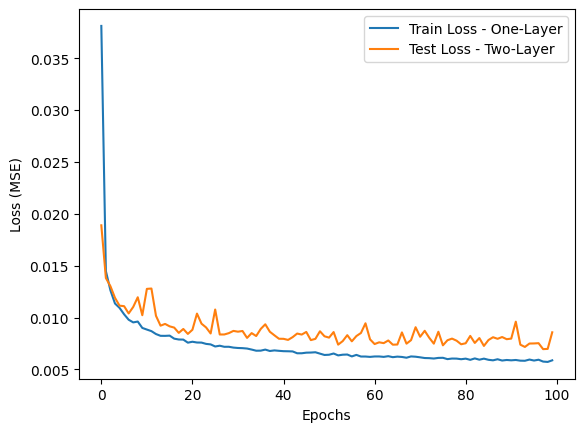

In [5]:
# Plot A and B on the same figure
plt.plot(train_loss, label = 'Train Loss - One-Layer')
plt.plot(test_loss, label='Test Loss - Two-Layer')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


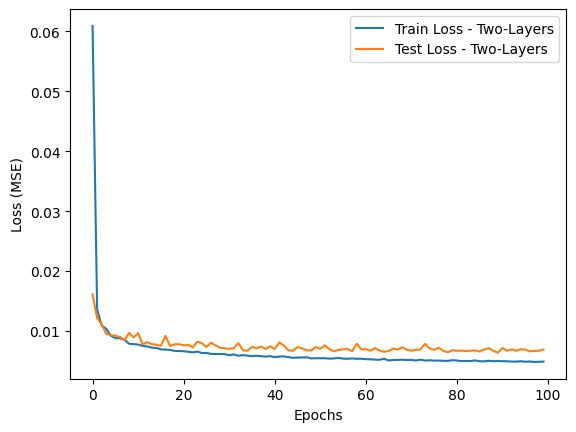

In [6]:
# Plot A and B on the same figure
plt.plot(train_loss2, label = 'Train Loss - Two-Layers')
plt.plot(test_loss2, label='Test Loss - Two-Layers')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


In [5]:
for (inp, out) in train_loader:
    src_mask = torch.any(inp != torch.tensor([0, 0], dtype=inp.dtype, device=inp.device), dim=-1)
    print(src_mask)
    print(src_mask.shape)
    break

tensor([[ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False]])
torch.Size([32, 1024])
